<a href="https://colab.research.google.com/github/arbaz2x/cifar100_python/blob/main/cifar100py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets ,layers ,models
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar100.load_data()
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Number of samples in dataset
print(f"Train: {x_train.shape[0]}")
print(f"Test: {x_test.shape[0]}")

# Data format
print(type(x_train))
print(type(y_train))



169001437/169001437 [==============================] - 7s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Train: 50000
Test: 10000
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Name of all classes in CIFAR-100
classes = ['beaver', 'dolphin', 'otter', 'seal', 'whale',
'aquarium' ,'fish', 'ray', 'shark', 'trout',
'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',
'bottles', 'bowls', 'cans', 'cups', 'plates',
'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers',
'clock', 'computer keyboard', 'lamp', 'telephone', 'television', 'bed', 'chair', 'couch', 'table', 'wardrobe',
'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
'bear', 'leopard', 'lion', 'tiger', 'wolf',
'bridge', 'castle', 'house', 'road', 'skyscraper',
'cloud', 'forest', 'mountain', 'plain', 'sea',
'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
'fox', 'porcupine', 'possum', 'raccoon', 'skunk',
'crab', 'lobster', 'snail', 'spider', 'worm',
'baby', 'boy', 'girl', 'man', 'woman',
'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',
'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',
'maple', 'oak', 'palm', 'pine', 'willow',
'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train',
'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

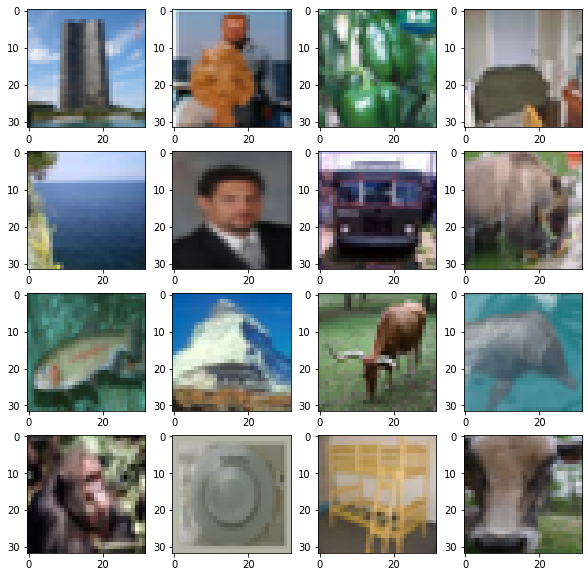

In [ ]:
import numpy as np
plt.figure(figsize=(10, 10))
for i in range (16):
  rand_num = np.random.randint(0, 50000)
  cifar_img = plt.subplot(4,4, i+1)
  plt.imshow(x_train[rand_num])

In [ ]:
# Import libraries for preprocessing images
from tensorflow.keras.utils import to_categorical

# Normalize images
train_images = x_train.astype('float32')/255
test_images = x_test.astype('float32')/255

#convert vector to binary
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Activation, Dropout

from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant
model = Sequential()

model.add(Conv2D(256,(3,3),padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization(momentum=0.95,
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05),
        gamma_initializer=Constant(value=0.9)))
model.add(Dense(100,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuration for creating new images
train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
)

X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=93)
train_datagen.fit(X_train)

In [ ]:
# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
import time
training_start = time.time()
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=64),
          steps_per_epoch=100,
          epochs=350,
          validation_data=(X_validation, y_validation),
          verbose=1)
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

Epoch 1/350
100/100 [==============================] - 17s 173ms/step - loss: 4.2951 - acc: 0.0670 - val_loss: 5.0825 - val_acc: 0.0128
Epoch 2/350
100/100 [==============================] - 16s 159ms/step - loss: 4.0551 - acc: 0.0914 - val_loss: 5.1454 - val_acc: 0.0169
Epoch 3/350
100/100 [==============================] - 16s 157ms/step - loss: 3.9344 - acc: 0.1091 - val_loss: 5.1725 - val_acc: 0.0233
Epoch 4/350
100/100 [==============================] - 16s 157ms/step - loss: 3.8295 - acc: 0.1214 - val_loss: 4.7008 - val_acc: 0.0511
Epoch 5/350
100/100 [==============================] - 16s 158ms/step - loss: 3.6801 - acc: 0.1450 - val_loss: 3.8907 - val_acc: 0.1157
Epoch 6/350
100/100 [==============================] - 16s 159ms/step - loss: 3.5812 - acc: 0.1600 - val_loss: 3.7397 - val_acc: 0.1406
Epoch 7/350
100/100 [==============================] - 21s 206ms/step - loss: 3.4624 - acc: 0.1753 - val_loss: 3.5062 - val_acc: 0.1722
Epoch 8/350
100/100 [===========================

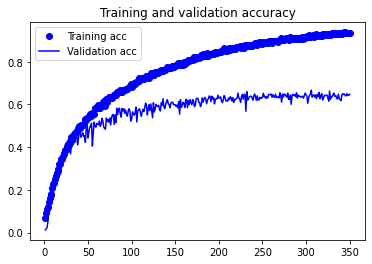

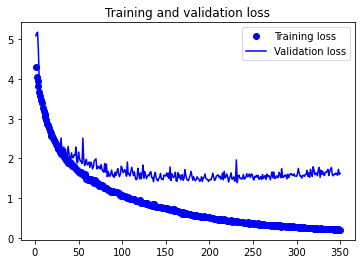

In [ ]:
import matplotlib.pyplot as plt
def training_plot(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()
training_plot(history)


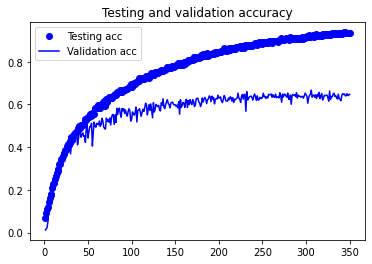

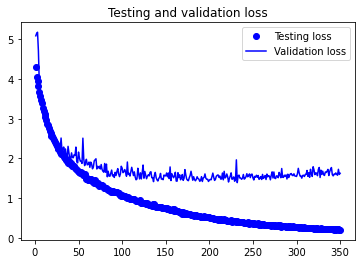

In [ ]:
import matplotlib.pyplot as plt
def testing_plot(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Testing acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Testing and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Testing loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Testing and validation loss')
  plt.legend()
  plt.show()
testing_plot(history)


In [ ]:
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

313/313 [==============================] - 6s 18ms/step - loss: 1.6035 - acc: 0.6510
accuracy on test set: acc of 65.10000228881836


In [ ]:
# Translate categorial to array for drawing confusion matrix
from sklearn.metrics import confusion_matrix
from numpy import argmax
prediction = []
true_labels = []

pred = model.predict(test_images)
print(test_labels.shape[0])
for i in range(test_labels.shape[0]):
  prediction.append(argmax(pred[i]))
  true_labels.append(argmax(test_labels[i]))

cm = confusion_matrix(prediction, true_labels)

313/313 [==============================] - 5s 16ms/step
10000


[[73  0  0 ...  0  0  0]
 [ 0 72  1 ...  0  0  0]
 [ 1  0 69 ...  1 13  1]
 ...
 [ 0  0  0 ... 75  0  0]
 [ 0  0  1 ...  0 34  0]
 [ 0  0  0 ...  0  0 56]]


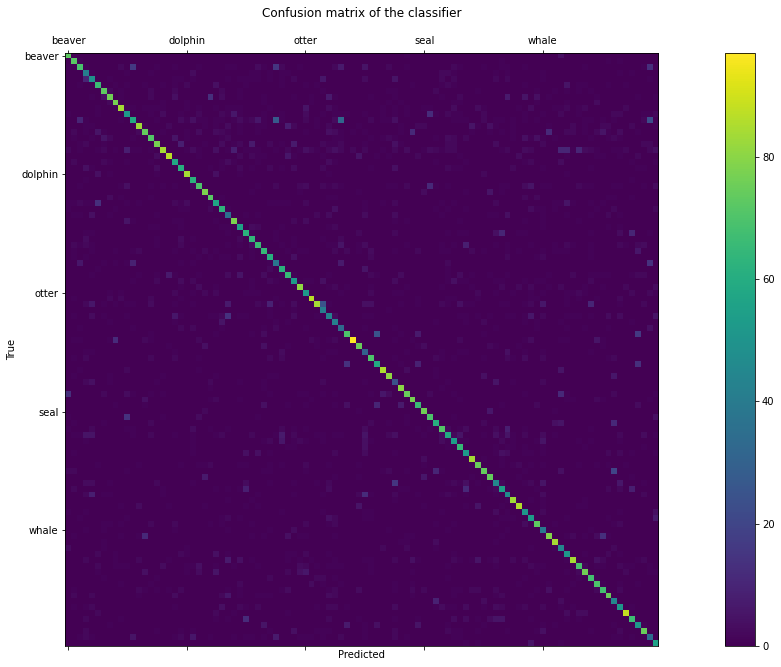

In [ ]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
print(cm)
fig = plt.figure(figsize=(24,24))
ax = fig.add_subplot(211)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + classes)
ax.set_yticklabels([''] + classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Calculating f1 score
from sklearn.metrics import f1_score
print(f"f1 score: {f1_score(true_labels, prediction, average='weighted')}")

f1 score: 0.651204915346965


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, prediction, target_names=classes, digits=5))

                   precision    recall  f1-score   support

           beaver    0.93590   0.73000   0.82022       100
          dolphin    0.94737   0.72000   0.81818       100
            otter    0.44231   0.69000   0.53906       100
             seal    0.66667   0.42000   0.51534       100
            whale    0.51042   0.49000   0.50000       100
         aquarium    0.68041   0.66000   0.67005       100
             fish    0.77660   0.73000   0.75258       100
              ray    0.53901   0.76000   0.63071       100
            shark    0.83696   0.77000   0.80208       100
            trout    0.63158   0.84000   0.72103       100
          orchids    0.44828   0.52000   0.48148       100
          poppies    0.27830   0.59000   0.37821       100
            roses    0.60145   0.83000   0.69748       100
       sunflowers    0.48366   0.74000   0.58498       100
           tulips    0.58197   0.71000   0.63964       100
          bottles    0.55797   0.77000   0.64706       